# Attacker Analysis

## Prerequisites

In [1]:
!pip install matplotlib-venn
!pip install kaggle
!pip install stix2 
!pip install taxii2-client
!pip install six
!pip install attackcti
!pip install tqdm

import os
import ast
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import numpy as np
# Additional imports for the new analyses
import plotly.express as px  # For fancy charts like treemaps and donut charts
import plotly.graph_objs as go  # For chord diagrams and advanced plotting
from matplotlib_venn import venn2  # For Venn diagrams, if needed
from sklearn.preprocessing import MultiLabelBinarizer
from tqdm import tqdm
import statsmodels.api as sm
import plotly.express as px


## A.1 Download our compiled attacker data from Kaggle
First, we need to load the data from the merged CSV file and prepare it for analysis.

In [6]:
# Step 2: Define the dataset identifier
dataset_identifier = 'synkorsink/cve-attack-ttp'  # Replace with your dataset identifier

# Step 3: Create a directory to store the dataset
os.makedirs('kaggle_dataset', exist_ok=True)

# Step 4: Download the dataset
!kaggle datasets download -d {dataset_identifier} -p kaggle_dataset --force

# Step 5: List all downloaded files
downloaded_files = os.listdir('kaggle_dataset')

# Step 6: Extract all zip files in the directory
for file_name in downloaded_files:
    if file_name.endswith('.zip'):
        with zipfile.ZipFile(os.path.join('kaggle_dataset', file_name), 'r') as zip_ref:
            zip_ref.extractall('kaggle_dataset')

attack_df = pd.read_csv('kaggle_dataset/cve_attack_mapping.csv')
# Save the DataFrame to a CSV file
attack_df.to_csv('cve_attack_mapping.csv', index=False)

attack_df.head(10)

Dataset URL: https://www.kaggle.com/datasets/synkorsink/cve-attack-ttp
License(s): apache-2.0
 99%|█████████████████████████████████████▌| 35.0M/35.4M [00:03<00:00, 13.7MB/s]
100%|██████████████████████████████████████| 35.4M/35.4M [00:03<00:00, 11.3MB/s]


/var/folders/qb/z7q3w2md0c3c0s29ngj6p0600000gn/T/ipykernel_33808/1397782334.py:19: DtypeWarning: Columns (0,1,2,3,4,5,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  attack_df = pd.read_csv('kaggle_dataset/cve_attack_mapping.csv')


,cve_id,description,publisher,published_date,cvss_version,cvss_vector,cvss_score,impact_score,exploitability_score,epss_score,cpe_strings,attack_tactic,attack_technique,confidence
0,CVE-2023-0001,An information exposure vulnerability in the P...,psirt@paloaltonetworks.com,2023-02-08T18:15Z,3.1,CVSS:3.1/AV:L/AC:L/PR:H/UI:N/S:U/C:H/I:H/A:H,6.7,5.9,0.8,0,[],['defense-evasion'],T1112,0.075567
1,CVE-2023-0002,A problem with a protection mechanism in the P...,psirt@paloaltonetworks.com,2023-02-08T18:15Z,3.1,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,7.8,5.9,1.8,0,[],['defense-evasion'],T1070,0.111238
2,CVE-2023-0003,A file disclosure vulnerability in the Palo Al...,psirt@paloaltonetworks.com,2023-02-08T18:15Z,3.1,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:N/A:N,6.5,3.6,2.8,0,['cpe:2.3:a:paloaltonetworks:cortex_xsoar:6.8....,['discovery'],T1083,0.190795
3,CVE-2023-0003,A file disclosure vulnerability in the Palo Al...,psirt@paloaltonetworks.com,2023-02-08T18:15Z,3.1,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:N/A:N,6.5,3.6,2.8,0,['cpe:2.3:a:paloaltonetworks:cortex_xsoar:6.8....,['command-and-control'],T1105,0.173198
4,CVE-2023-0003,A file disclosure vulnerability in the Palo Al...,psirt@paloaltonetworks.com,2023-02-08T18:15Z,3.1,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:N/A:N,6.5,3.6,2.8,0,['cpe:2.3:a:paloaltonetworks:cortex_xsoar:6.8....,['collection'],T1005,0.166163
5,CVE-2023-0004,A local file deletion vulnerability in Palo Al...,psirt@paloaltonetworks.com,2023-04-12T17:15Z,3.1,CVSS:3.1/AV:N/AC:L/PR:H/UI:N/S:U/C:N/I:H/A:H,6.5,5.2,1.2,0,['cpe:2.3:o:paloaltonetworks:pan-os:*:*:*:*:*:...,['defense-evasion'],T1070,0.652210
6,CVE-2023-0005,A vulnerability in Palo Alto Networks PAN-OS s...,psirt@paloaltonetworks.com,2023-04-12T17:15Z,3.1,CVSS:3.1/AV:N/AC:L/PR:H/UI:N/S:U/C:H/I:N/A:N,4.9,3.6,1.2,0,['cpe:2.3:o:paloaltonetworks:pan-os:*:*:*:*:*:...,['credential-access'],T1552,0.328307
7,CVE-2023-0006,A local file deletion vulnerability in the Pal...,psirt@paloaltonetworks.com,2023-04-12T17:15Z,3.1,CVSS:3.1/AV:L/AC:H/PR:L/UI:N/S:U/C:N/I:H/A:H,6.3,5.2,1.0,0,['cpe:2.3:a:paloaltonetworks:globalprotect:6.1...,['defense-evasion'],T1070,0.715306
8,CVE-2023-0007,A cross-site scripting (XSS) vulnerability in ...,psirt@paloaltonetworks.com,2023-05-10T17:15Z,3.1,CVSS:3.1/AV:N/AC:L/PR:H/UI:R/S:C/C:L/I:L/A:N,4.8,2.7,1.7,0,[],['collection'],T1185,0.075816
9,CVE-2023-0008,A file disclosure vulnerability in Palo Alto N...,psirt@paloaltonetworks.com,2023-05-10T17:15Z,3.1,CVSS:3.1/AV:N/AC:H/PR:H/UI:N/S:U/C:H/I:N/A:N,4.4,3.6,0.7,0,['cpe:2.3:o:paloaltonetworks:pan-os:*:*:*:*:*:...,['collection'],T1005,0.135041


## A.2 Filter out techniques with confidence below 0.175

In [40]:
print(len(attack_df['cve_id'].unique()))
print(len(attack_df))
attack_df = attack_df[attack_df['confidence'] >= 0.175]
print(len(attack_df['cve_id'].unique()))

265971
413646
160456


## A.2 Check CVE rejected reasons

In [42]:
# Filter descriptions starting with 'Rejected'
rejected_df = attack_df[attack_df['description'].str.startswith('Rejected')]

# Sort the filtered DataFrame in descending order based on description
rejected_df = rejected_df.sort_values(by='description', ascending=False)
rejected_df['reason'] = rejected_df['description'].str.replace('Rejected:', '').str.strip()

# Group by the reasons and count occurrences
reason_counts = rejected_df['reason'].value_counts().nlargest(10)

print(len(rejected_df))

# Remove descriptions starting with 'Rejected' from attack_df
attack_df = attack_df[~attack_df['description'].str.startswith('Rejected')]

# Sort the remaining DataFrame in descending order based on some column (optional)
# For example, you could sort by 'description' or any other column you need:
attack_df = attack_df.sort_values(by='description', ascending=False)

print(len(attack_df))
print(len(attack_df['cve_id'].unique()))


1167
262062
159301


## A3. Show descriptive statistics for columns

In [44]:
attack_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,cvss_version,cvss_score,impact_score,exploitability_score,epss_score,confidence
count,262062,243854,243854,243854,262062,262062
mean,2.67229,7.01007,5.05686,4.45354,0,0.297786
std,0.5215,1.77711,2.04343,3.05259,0,0.118369
min,2,0,0,0.1,0,0.175001
25%,2,5.5,3.6,2.1,0,0.208775
50%,3,7.5,5.9,3.9,0,0.267598
75%,3.1,7.8,5.9,6.8,0,0.34789
max,3.1,10,10,10,0,0.903186


## A.4 Show CVEs by year

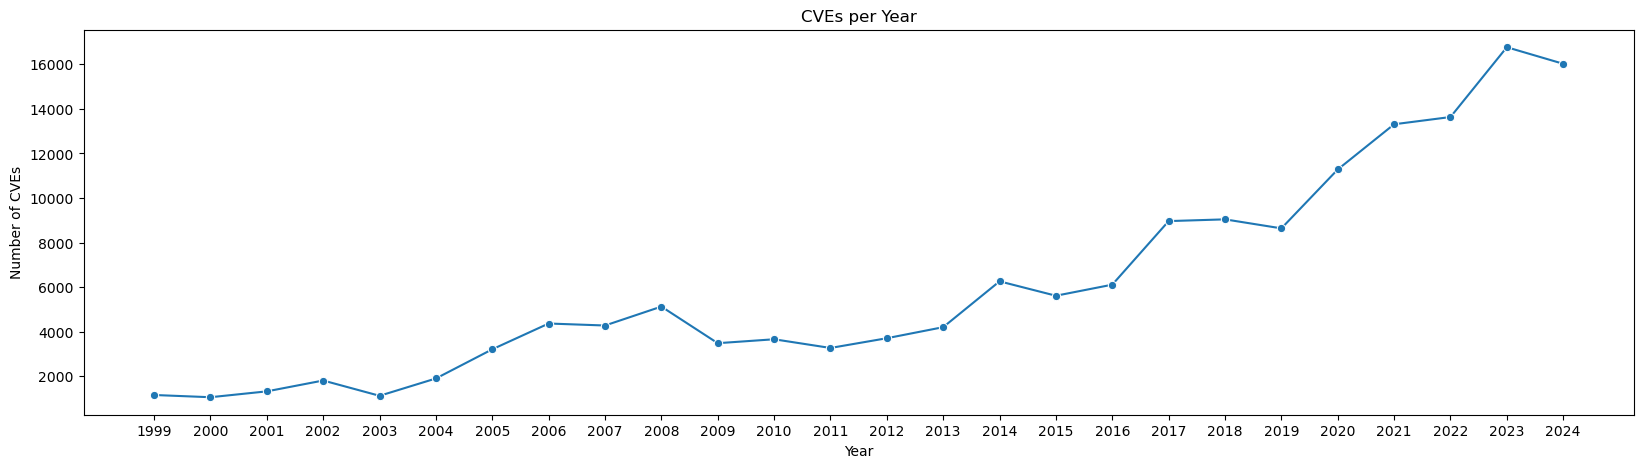

In [46]:
# Extract year from CVE ID
a4_df = attack_df

# Extract the year from the CVE identifier
a4_df['year'] = a4_df['cve_id'].str.split('-').str[1]

# Convert to integer if necessary
a4_df['year'] = a4_df['year'].astype(int)

# Remove specified columns
a4_df = a4_df.drop(columns=['attack_technique', 'confidence', 'attack_mitigation', 'defend_tactic', 'defend_technique'])

# Remove duplicate entries based on CVE ID, keeping the first occurrence
a4_df = a4_df.drop_duplicates(subset=['cve_id'])

years = list(range(a4_df['year'].min(), a4_df['year'].max() + 1))
cves_per_year = a4_df['year'].value_counts().reindex(years, fill_value=0).sort_index()
plt.figure(figsize=(20, 5))
sns.lineplot(x=cves_per_year.index, y=cves_per_year.values, marker='o')
plt.title('CVEs per Year')
plt.xlabel('Year')
plt.ylabel('Number of CVEs')
plt.xticks(cves_per_year.index)
plt.show()

## F.1 Findings


### A.3.1 ATT&CK tactics found in CVE and their kill chain phases

In [49]:
# Step 1: Ensure attack_tactic column contains valid lists
attack_df['attack_tactic'] = attack_df['attack_tactic'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Step 2: Drop rows with NaN in attack_tactic
a31_df = attack_df.dropna(subset=['attack_tactic'])


# Step 3: Explode the list of attack_tactic into separate rows
a31_df = a31_df.explode('attack_tactic')

a31_df = a31_df.drop_duplicates(subset=['cve_id', 'attack_tactic'])

# Step 4: Create the mapping between dataset format and the ATT&CK kill chain
tactic_mapping = {
    'reconnaissance': 'Reconnaissance',
    'resource-development': 'Resource Development',
    'initial-access': 'Initial Access',
    'execution': 'Execution',
    'persistence': 'Persistence',
    'privilege-escalation': 'Privilege Escalation',
    'defense-evasion': 'Defense Evasion',
    'credential-access': 'Credential Access',
    'discovery': 'Discovery',
    'lateral-movement': 'Lateral Movement',
    'collection': 'Collection',
    'command-and-control': 'Command and Control',
    'exfiltration': 'Exfiltration',
    'impact': 'Impact'
}

# Step 5: Translate the attack_tactic values using the mapping
a31_df['attack_tactic_translated'] = a31_df['attack_tactic'].map(tactic_mapping)

# Step 6: Define the kill chain phases in the correct order
kill_chain_phases = [
    'Reconnaissance', 'Resource Development', 'Initial Access', 'Execution',
    'Persistence', 'Privilege Escalation', 'Defense Evasion', 'Credential Access',
    'Discovery', 'Lateral Movement', 'Collection', 'Command and Control',
    'Exfiltration', 'Impact'
]

# Step 7: Count the occurrences of each translated tactic
tactic_counts_translated = a31_df['attack_tactic_translated'].value_counts().reindex(kill_chain_phases).fillna(0)

# Step 8: Calculate relative values (percentages)
total_tactics = tactic_counts_translated.sum()
tactic_relative_values = (tactic_counts_translated / total_tactics) * 100

# Check if the total of the relative values equals 100%
total_percentage = tactic_relative_values.sum()
if not np.isclose(total_percentage, 100.0, atol=0.01):
    print(f"Warning: The total percentage is {total_percentage:.2f}% instead of 100.00%")
else:
    print(f"The total percentage is {total_percentage:.2f}% and sums up correctly to 100%.")

# Print the LaTeX commands with the calculated percentages
latex_command_template = "\\newcommand{{\\{name}Pct}}{{{value:.2f}\\%}}"

phase_to_command_name = {
    'Reconnaissance': 'Recon',
    'Resource Development': 'Resource',
    'Initial Access': 'Initial',
    'Execution': 'Execution',
    'Persistence': 'Persistence',
    'Privilege Escalation': 'Privilege',
    'Defense Evasion': 'Defense',
    'Credential Access': 'Credential',
    'Discovery': 'Discovery',
    'Lateral Movement': 'Lateral',
    'Collection': 'Collection',
    'Command and Control': 'Command',
    'Exfiltration': 'Exfiltration',
    'Impact': 'Impact'
}

for phase, value in tactic_relative_values.items():
    latex_command = latex_command_template.format(name=phase_to_command_name[phase], value=value)
    print(latex_command)


The total percentage is 100.00% and sums up correctly to 100%.
\newcommand{\ReconPct}{0.11\%}
\newcommand{\ResourcePct}{1.19\%}
\newcommand{\InitialPct}{7.63\%}
\newcommand{\ExecutionPct}{19.61\%}
\newcommand{\PersistencePct}{6.96\%}
\newcommand{\PrivilegePct}{9.99\%}
\newcommand{\DefensePct}{20.13\%}
\newcommand{\CredentialPct}{4.54\%}
\newcommand{\DiscoveryPct}{5.96\%}
\newcommand{\LateralPct}{2.90\%}
\newcommand{\CollectionPct}{3.03\%}
\newcommand{\CommandPct}{4.89\%}
\newcommand{\ExfiltrationPct}{0.07\%}
\newcommand{\ImpactPct}{12.99\%}


### A.3.1 ATT&CK techniques found in CVEs

### A.3.3 ATT&CK technique distribution within CVEs over the years

In [53]:
import pandas as pd
import numpy as np
import plotly.express as px
import ast

# Assume the dataframe 'df' is already loaded and prepared

# Step 1: Check and ensure attack_tactic column contains lists
def ensure_list_format(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return x  # Return as-is if it's already a valid string or list
    elif isinstance(x, list):
        return x  # Return as-is if it's already a list
    else:
        return np.nan  # Set invalid values to NaN

attack_df['attack_tactic'] = attack_df['attack_tactic'].apply(ensure_list_format)

# Step 2: Drop rows with NaN in attack_tactic and make a copy to avoid the SettingWithCopyWarning
a33_df = attack_df.dropna(subset=['attack_tactic']).copy()

# Step 3: Extract the year from the published_date column using .loc[] to avoid the warning
a33_df.loc[:, 'published_year'] = pd.to_datetime(a33_df['published_date']).dt.year

# Step 4: Explode the attack_tactic list into separate rows to count each tactic per year
a33_df = a33_df.explode('attack_tactic')

# Step 4: Create the mapping between dataset format and the ATT&CK kill chain
tactic_mapping = {
    'reconnaissance': 'Reconnaissance',
    'resource-development': 'Resource Development',
    'initial-access': 'Initial Access',
    'execution': 'Execution',
    'persistence': 'Persistence',
    'privilege-escalation': 'Privilege Escalation',
    'defense-evasion': 'Defense Evasion',
    'credential-access': 'Credential Access',
    'discovery': 'Discovery',
    'lateral-movement': 'Lateral Movement',
    'collection': 'Collection',
    'command-and-control': 'Command and Control',
    'exfiltration': 'Exfiltration',
    'impact': 'Impact'
}

# Step 5: Translate the attack_tactic values using the mapping and filter only mapped values
a33_df['attack_tactic_translated'] = a33_df['attack_tactic'].map(tactic_mapping)
a33_df = a33_df.dropna(subset=['attack_tactic_translated'])

# Step 6: Group the data by year and translated attack_tactic, and count occurrences
tactic_by_year = a33_df.groupby(['published_year', 'attack_tactic_translated']).size().reset_index(name='count')

# Step 7: Pivot the data so that each column represents an attack tactic, and each row represents a year
pivot_tactic_year = tactic_by_year.pivot(index='published_year', columns='attack_tactic_translated', values='count').fillna(0)

# Step 8: Normalize the data by year to calculate the relative amount of each attack tactic (in percentage)
pivot_tactic_year_normalized = pivot_tactic_year.div(pivot_tactic_year.sum(axis=1), axis=0).fillna(0)  # Multiply by 100 to get percentage values

color_discrete_map = {
    'Reconnaissance': '#1f77b4',  # Muted Blue
    'Resource Development': '#ff7f0e',  # Orange
    'Initial Access': '#2ca02c',  # Green
    'Execution': '#d62728',  # Red
    'Persistence': '#9467bd',  # Purple
    'Privilege Escalation': '#8c564b',  # Brown
    'Defense Evasion': '#e377c2',  # Pink
    'Credential Access': '#17becf',  # Teal
    'Discovery': '#bcbd22',  # Olive Yellow
    'Lateral Movement': '#7f7f7f',  # Dark Gray
    'Collection': '#c5b0d5',  # Light Purple
    'Command and Control': '#f7b6d2',  # Light Pink
    'Exfiltration': '#98df8a',  # Light Green
    'Impact': '#ff9896',  # Coral Red
}

# Step 9: Plot a Streamgraph using Plotly with distinct colors for each tactic
fig = px.area(
    pivot_tactic_year_normalized,
    x=pivot_tactic_year_normalized.index,
    y=pivot_tactic_year_normalized.columns,
    labels={
        "value": "Relative frequency (%)",  # Update label to show percentage
        "published_year": "Year",
        "attack_tactic_translated": ""
    },
    color_discrete_map=color_discrete_map
)

# Update layout to remove the legend title and position the legend above the figure
fig.update_layout(
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.1,  # Position the legend above the figure
        xanchor="center",
        x=0.5,
        font=dict(size=9)  # Set the font size for the legend

    ),
    width=600,
    height=400,
    title={'x': 0.5},  # Center the title
    margin=dict(l=20, r=20, t=60, b=20),  # Adjust margins for better spacing
    yaxis_tickformat='%',  # Set y-axis to show percentage
)
# Display the Streamgraph
fig.show()


### CPE Analysis

In [55]:
# Step 0: Transform cpe_strings from strings to actual lists
attack_df['cpe_strings'] = attack_df['cpe_strings'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Step 1: Filter out rows with empty CPE strings
a34_df = attack_df[attack_df['cpe_strings'].apply(lambda x: len(x) > 0 and x != [])].copy()

# Step 2: Categorize CPE Strings by operating system (o), application (a), and hardware (h)
def categorize_cpe(cpe_strings):
    os_cpes = []
    app_cpes = []
    hw_cpes = []
    
    if isinstance(cpe_strings, list):  # Ensure it's a list
        for cpe in cpe_strings:
            if isinstance(cpe, str):
                if cpe.startswith('cpe:2.3:o'):
                    os_cpes.append(cpe)
                elif cpe.startswith('cpe:2.3:a'):
                    app_cpes.append(cpe)
                elif cpe.startswith('cpe:2.3:h'):
                    hw_cpes.append(cpe)
    return os_cpes, app_cpes, hw_cpes

# Apply the categorization function to each row
a34_df['os_cpes'], a34_df['app_cpes'], a34_df['hw_cpes'] = zip(*a34_df['cpe_strings'].apply(categorize_cpe))

# Keep only necessary columns
a34_df = a34_df[['cve_id', 'published_date', 'cpe_strings', 'attack_tactic', 'attack_technique', 'os_cpes', 'app_cpes', 'hw_cpes']]


In [56]:
a34_df = a34_df.explode('attack_tactic')

# Step 1: Define a function to calculate the absolute count and percentage of CVEs for each category
def calculate_cve_statistics(df, cpe_column):
    # Filter the dataframe to only include rows where the corresponding cpe_column is not empty
    category_df = df[df[cpe_column].apply(lambda x: len(x) > 0)]
    total_cves = len(df.drop_duplicates(subset='cve_id'))  # Total unique CVEs in the dataset
    cve_count = len(category_df['cve_id'].unique())  # Unique CVEs affecting this category
    
    # Calculate percentage of CVEs affecting this category
    cve_percentage = (cve_count / total_cves) * 100 if total_cves > 0 else 0
    return cve_count, cve_percentage

# Step 2: Calculate absolute counts and percentages for each category (Hardware, OS, Software)
hw_cve_count, hw_cve_percentage = calculate_cve_statistics(a34_df, 'hw_cpes')
os_cve_count, os_cve_percentage = calculate_cve_statistics(a34_df, 'os_cpes')
app_cve_count, app_cve_percentage = calculate_cve_statistics(a34_df, 'app_cpes')

# Display the results
print(f"Hardware: {hw_cve_count} CVEs ({hw_cve_percentage:.2f}%)")
print(f"Operating Systems: {os_cve_count} CVEs ({os_cve_percentage:.2f}%)")
print(f"Software: {app_cve_count} CVEs ({app_cve_percentage:.2f}%)")
total = hw_cve_count+os_cve_count+app_cve_count
print(f"TOTAL: {total} of {len(attack_df['cve_id'].unique())} {total/len(attack_df['cve_id'].unique())}")


# Step 1: Define a function to calculate the percentage for each category (HW, OS, SW)
def calculate_percentages(df, cpe_column, tactic_column):
    # Filter the dataframe to only include rows where the corresponding cpe_column is not empty
    category_df = df[df[cpe_column].apply(lambda x: len(x) > 0)]
    
    # Total number of CVEs in this category (for tactics where the corresponding CPEs are present)
    total_cves_in_category = len(category_df)
    
    # Count how many CVEs affect each tactic in this category
    tactic_counts = category_df.groupby(tactic_column)[cpe_column].apply(
        lambda x: sum([1 for cpe_list in x if len(cpe_list) > 0])
    )
    
    # Return the percentage for each tactic
    return (tactic_counts / total_cves_in_category) * 100 if total_cves_in_category > 0 else pd.Series([])

# Step 2: Calculate percentages for each category (Hardware, Operating Systems, and Applications)
hw_percentages = calculate_percentages(a34_df, 'hw_cpes', 'attack_tactic')  # Hardware
os_percentages = calculate_percentages(a34_df, 'os_cpes', 'attack_tactic')  # Operating Systems
app_percentages = calculate_percentages(a34_df, 'app_cpes', 'attack_tactic')  # Applications


# Combine all percentages into a single DataFrame and fill missing values with 0
percentages_df = pd.DataFrame({
    'HW': hw_percentages,
    'OS': os_percentages,
    'SW': app_percentages
}).fillna(0)

# Capitalize and format tactic names (and maintain the correct order)
ordered_tactic_names = [
    'Reconnaissance', 'Resource Development', 'Initial Access', 'Execution', 
    'Persistence', 'Privilege Escalation', 'Defense Evasion', 'Credential Access',
    'Discovery', 'Lateral Movement', 'Collection', 'Command and Control', 
    'Exfiltration', 'Impact'
]

# Apply the tactic name mapping to the index and reorder the rows
tactic_name_map = {
    'resource-development': 'Resource Development',
    'collection': 'Collection',
    'command-and-control': 'Command and Control',
    'credential-access': 'Credential Access',
    'defense-evasion': 'Defense Evasion',
    'discovery': 'Discovery',
    'execution': 'Execution',
    'exfiltration': 'Exfiltration',
    'impact': 'Impact',
    'initial-access': 'Initial Access',
    'lateral-movement': 'Lateral Movement',
    'persistence': 'Persistence',
    'privilege-escalation': 'Privilege Escalation',
    'reconnaissance': 'Reconnaissance'
}
percentages_df.index = percentages_df.index.map(tactic_name_map)
percentages_df = percentages_df.reindex(ordered_tactic_names)

# Round the percentages for better readability
percentages_df = percentages_df.round(2)

# Step 3: Add a bullet before the top 3 values in each column
def format_column_top3_with_bullet(df):
    # Iterate through each column to identify the top 3 values and apply bullet formatting
    for column in df.columns:
        top3_indices = df[column].nlargest(3).index  # Get the indices of the top 3 values
        df[column] = df[column].apply(lambda x: f'$\\bullet$\\ {x:.2f}\\%' if x in df.loc[top3_indices, column].values else f'{x:.2f}\\%')
    return df

# Format the DataFrame with bullets for the top 3 values in each column
formatted_df = format_column_top3_with_bullet(percentages_df.copy())

# Step 4: Calculate the sum for each column and add as the last row
summary_row = percentages_df.sum().round(2).apply(lambda x: f'{x:.2f}\\%')
formatted_df.loc['$\sum$'] = summary_row

# Step 5: Generate the LaTeX table
latex_table = "\\begin{tabular}{lrrr}\n\\toprule\n"
latex_table += " \\textbf{ATT\&CK Tactic} & \\textbf{Hardware} & \\textbf{Operating System} & \\textbf{Software} \\\\\n\\midrule\n"

for idx, row in formatted_df.iterrows():  # Iterate over the DataFrame rows
    row_values = " & ".join(row)
    latex_table += f"{idx} & {row_values} \\\\\n"

latex_table += "\\bottomrule\n\\end{tabular}"

# Output the generated LaTeX table
print(latex_table)


Hardware: 1584 CVEs (1.27%)
Operating Systems: 28142 CVEs (22.51%)
Software: 105651 CVEs (84.51%)
TOTAL: 135377 of 159301 0.8498188963032247
\begin{tabular}{lrrr}
\toprule
 \textbf{ATT\&CK Tactic} & \textbf{Hardware} & \textbf{Operating System} & \textbf{Software} \\
\midrule
Reconnaissance & 0.03\% & 0.06\% & 0.12\% \\
Resource Development & 0.40\% & 0.56\% & 1.46\% \\
Initial Access & 3.63\% & 2.00\% & 7.69\% \\
Execution & 4.74\% & 11.51\% & $\bullet$\ 17.43\% \\
Persistence & 7.26\% & 4.58\% & 6.84\% \\
Privilege Escalation & 7.38\% & $\bullet$\ 20.24\% & 9.05\% \\
Defense Evasion & $\bullet$\ 18.76\% & $\bullet$\ 21.03\% & $\bullet$\ 19.43\% \\
Credential Access & $\bullet$\ 11.10\% & 2.78\% & 5.37\% \\
Discovery & 6.61\% & 4.99\% & 6.18\% \\
Lateral Movement & 2.83\% & 2.26\% & 2.73\% \\
Collection & 2.28\% & 2.23\% & 3.02\% \\
Command and Control & 7.44\% & 2.90\% & 4.98\% \\
Exfiltration & 0.28\% & 0.08\% & 0.07\% \\
Impact & $\bullet$\ 27.25\% & $\bullet$\ 24.77\% & $\bullet$\

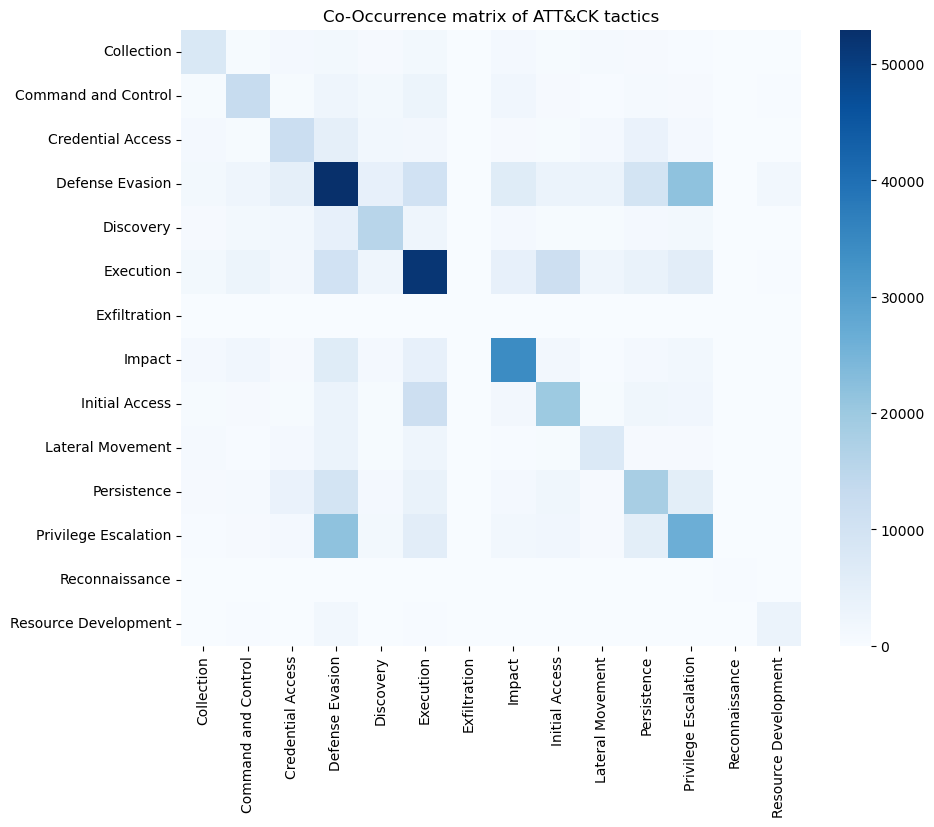

In [57]:
# Step 2: Filter out NaN values from 'attack_tactic' and ensure all values are lists
a35_df = attack_df.dropna(subset=['attack_tactic']).copy()  # Make a copy to avoid SettingWithCopyWarning
a35_df.loc[:, 'attack_tactic'] = a35_df['attack_tactic'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Step 3: Translate attack tactics using the mapping and filter only mapped values
def translate_tactics(tactics):
    # Use tactic_mapping to translate each tactic
    return [tactic_mapping[t] for t in tactics if t in tactic_mapping]

a35_df.loc[:, 'attack_tactic'] = a35_df['attack_tactic'].apply(translate_tactics)

# Step 4: Remove rows where no valid tactics are left after mapping
a35_df = a35_df[a35_df['attack_tactic'].apply(lambda x: len(x) > 0)]

# Step 5: Grouping by CVE ID and converting attack tactics into a list
# Flatten any nested lists (in case of double nesting)
def flatten(tactic_list):
    return [item for sublist in tactic_list for item in sublist] if isinstance(tactic_list[0], list) else tactic_list

co_occurrence = a35_df.groupby('cve_id')['attack_tactic'].apply(lambda x: flatten(list(x)))

# Step 6: MultiLabelBinarizer transformation to create binary matrix for attack tactics
mlb = MultiLabelBinarizer()

# Use tqdm to monitor the transformation process
binary_matrix = pd.DataFrame(mlb.fit_transform(co_occurrence), columns=mlb.classes_, index=co_occurrence.index)

# Step 7: Create co-occurrence matrix (how often tactics occur together)
co_occurrence_matrix = binary_matrix.T.dot(binary_matrix)

# Visualize the co-occurrence matrix
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, cmap="Blues", annot=False)
plt.title('Co-Occurrence matrix of ATT&CK tactics')
plt.show()

In [58]:
import pandas as pd
import ast

# Assuming 'df' is your original DataFrame that contains 'cve_id' and 'attack_tactic' columns

# Step 1: Ensure 'attack_tactic' is a list (if it's stored as a string in some cases)
attack_df['attack_tactic'] = attack_df['attack_tactic'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Step 2: Drop rows where 'attack_tactic' is NaN or invalid (e.g., not a list)
a35_df = attack_df.dropna(subset=['attack_tactic'])

# Step 3: Aggregate attack tactics by CVE ID
a35_df = a35_df.groupby('cve_id')['attack_tactic'].agg(lambda x: [item for sublist in x for item in sublist]).reset_index()

# Step 4: Filter CVEs based on the number of unique tactics
a35_df['unique_tactics'] = a35_df['attack_tactic'].apply(lambda tactics: len(set(tactics)))  # Count unique tactics

# Step 5: Calculate the number and percentage of CVEs with 1 to 14 unique tactics
total_cves = a35_df['cve_id'].nunique()

single_tactic_cves = a35_df[a35_df['unique_tactics'] == 1]['cve_id'].nunique()
two_tactic_cves = a35_df[a35_df['unique_tactics'] == 2]['cve_id'].nunique()
three_tactic_cves = a35_df[a35_df['unique_tactics'] == 3]['cve_id'].nunique()
four_tactic_cves = a35_df[a35_df['unique_tactics'] == 4]['cve_id'].nunique()
five_tactic_cves = a35_df[a35_df['unique_tactics'] == 5]['cve_id'].nunique()
six_tactic_cves = a35_df[a35_df['unique_tactics'] == 6]['cve_id'].nunique()
seven_tactic_cves = a35_df[a35_df['unique_tactics'] == 7]['cve_id'].nunique()
eight_tactic_cves = a35_df[a35_df['unique_tactics'] == 8]['cve_id'].nunique()
nine_tactic_cves = a35_df[a35_df['unique_tactics'] == 9]['cve_id'].nunique()
ten_tactic_cves = a35_df[a35_df['unique_tactics'] == 10]['cve_id'].nunique()
eleven_tactic_cves = a35_df[a35_df['unique_tactics'] == 11]['cve_id'].nunique()
twelve_tactic_cves = a35_df[a35_df['unique_tactics'] == 12]['cve_id'].nunique()
thirteen_tactic_cves = a35_df[a35_df['unique_tactics'] == 13]['cve_id'].nunique()
fourteen_tactic_cves = a35_df[a35_df['unique_tactics'] == 14]['cve_id'].nunique()

# Calculate percentages
percentage_single_tactic = (single_tactic_cves / total_cves) * 100
percentage_two_tactic = (two_tactic_cves / total_cves) * 100
percentage_three_tactic = (three_tactic_cves / total_cves) * 100
percentage_four_tactic = (four_tactic_cves / total_cves) * 100
percentage_five_tactic = (five_tactic_cves / total_cves) * 100
percentage_six_tactic = (six_tactic_cves / total_cves) * 100
percentage_seven_tactic = (seven_tactic_cves / total_cves) * 100
percentage_eight_tactic = (eight_tactic_cves / total_cves) * 100
percentage_nine_tactic = (nine_tactic_cves / total_cves) * 100
percentage_ten_tactic = (ten_tactic_cves / total_cves) * 100
percentage_eleven_tactic = (eleven_tactic_cves / total_cves) * 100
percentage_twelve_tactic = (twelve_tactic_cves / total_cves) * 100
percentage_thirteen_tactic = (thirteen_tactic_cves / total_cves) * 100
percentage_fourteen_tactic = (fourteen_tactic_cves / total_cves) * 100

# Step 6: Display the results
print(f"CVEs with only one unique tactic: {single_tactic_cves} out of {total_cves} CVEs")
print(f"Percentage of CVEs with one unique tactic: {percentage_single_tactic:.2f}%")

print(f"CVEs with two unique tactics: {two_tactic_cves} out of {total_cves} CVEs")
print(f"Percentage of CVEs with two unique tactics: {percentage_two_tactic:.2f}%")

print(f"CVEs with three unique tactics: {three_tactic_cves} out of {total_cves} CVEs")
print(f"Percentage of CVEs with three unique tactics: {percentage_three_tactic:.2f}%")

print(f"CVEs with four unique tactics: {four_tactic_cves} out of {total_cves} CVEs")
print(f"Percentage of CVEs with four unique tactics: {percentage_four_tactic:.2f}%")

print(f"CVEs with five unique tactics: {five_tactic_cves} out of {total_cves} CVEs")
print(f"Percentage of CVEs with five unique tactics: {percentage_five_tactic:.2f}%")

print(f"CVEs with six unique tactics: {six_tactic_cves} out of {total_cves} CVEs")
print(f"Percentage of CVEs with six unique tactics: {percentage_six_tactic:.2f}%")

print(f"CVEs with seven unique tactics: {seven_tactic_cves} out of {total_cves} CVEs")
print(f"Percentage of CVEs with seven unique tactics: {percentage_seven_tactic:.2f}%")

print(f"CVEs with eight unique tactics: {eight_tactic_cves} out of {total_cves} CVEs")
print(f"Percentage of CVEs with eight unique tactics: {percentage_eight_tactic:.2f}%")

print(f"CVEs with nine unique tactics: {nine_tactic_cves} out of {total_cves} CVEs")
print(f"Percentage of CVEs with nine unique tactics: {percentage_nine_tactic:.2f}%")

print(f"CVEs with ten unique tactics: {ten_tactic_cves} out of {total_cves} CVEs")
print(f"Percentage of CVEs with ten unique tactics: {percentage_ten_tactic:.2f}%")

print(f"CVEs with eleven unique tactics: {eleven_tactic_cves} out of {total_cves} CVEs")
print(f"Percentage of CVEs with eleven unique tactics: {percentage_eleven_tactic:.2f}%")

print(f"CVEs with twelve unique tactics: {twelve_tactic_cves} out of {total_cves} CVEs")
print(f"Percentage of CVEs with twelve unique tactics: {percentage_twelve_tactic:.2f}%")

print(f"CVEs with thirteen unique tactics: {thirteen_tactic_cves} out of {total_cves} CVEs")
print(f"Percentage of CVEs with thirteen unique tactics: {percentage_thirteen_tactic:.2f}%")

print(f"CVEs with fourteen unique tactics: {fourteen_tactic_cves} out of {total_cves} CVEs")
print(f"Percentage of CVEs with fourteen unique tactics: {percentage_fourteen_tactic:.2f}%")

# Optionally, save the results to a file
# df_aggregated.to_csv("cves_with_tactic_counts.csv", index=False)


CVEs with only one unique tactic: 88157 out of 159301 CVEs
Percentage of CVEs with one unique tactic: 55.34%
CVEs with two unique tactics: 48463 out of 159301 CVEs
Percentage of CVEs with two unique tactics: 30.42%
CVEs with three unique tactics: 15743 out of 159301 CVEs
Percentage of CVEs with three unique tactics: 9.88%
CVEs with four unique tactics: 4906 out of 159301 CVEs
Percentage of CVEs with four unique tactics: 3.08%
CVEs with five unique tactics: 1385 out of 159301 CVEs
Percentage of CVEs with five unique tactics: 0.87%
CVEs with six unique tactics: 422 out of 159301 CVEs
Percentage of CVEs with six unique tactics: 0.26%
CVEs with seven unique tactics: 191 out of 159301 CVEs
Percentage of CVEs with seven unique tactics: 0.12%
CVEs with eight unique tactics: 33 out of 159301 CVEs
Percentage of CVEs with eight unique tactics: 0.02%
CVEs with nine unique tactics: 1 out of 159301 CVEs
Percentage of CVEs with nine unique tactics: 0.00%
CVEs with ten unique tactics: 0 out of 159301

In [59]:

# Step 5: Perform logistic regression for each tactic pair to analyze co-occurrence
regression_results = {}

# Use tqdm to monitor regression progress

for tactic in tqdm(binary_matrix.columns):
    y = binary_matrix[tactic]  # Dependent variable: presence of this tactic
    
    # Independent variables: presence of other tactics
    X = binary_matrix.drop(columns=[tactic])  # Exclude the current tactic from independent variables
    X = sm.add_constant(X)  # Add a constant term for the intercept
    
    # Perform logistic regression
    model = sm.Logit(y, X)
    result = model.fit(disp=0)  # Suppress output
    
    # Store the summary of the regression result
    regression_results[tactic] = result.summary()
    print(result.summary())

  7%|███▏                                        | 1/14 [00:01<00:13,  1.02s/it]

                           Logit Regression Results                           
Dep. Variable:             Collection   No. Observations:               159301
Model:                          Logit   Df Residuals:                   159287
Method:                           MLE   Df Model:                           13
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.1129
Time:                        10:23:18   Log-Likelihood:                -28044.
converged:                       True   LL-Null:                       -31615.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2292      0.029    -42.930      0.000      -1.285      -1.173
Command and Control     -1.4735      0.055    -26.855      0.000      -1.581      -1.366
Credential A

 14%|██████▎                                     | 2/14 [00:02<00:14,  1.21s/it]

                            Logit Regression Results                           
Dep. Variable:     Command and Control   No. Observations:               159301
Model:                           Logit   Df Residuals:                   159287
Method:                            MLE   Df Model:                           13
Date:                 Mon, 18 Nov 2024   Pseudo R-squ.:                 0.09883
Time:                         10:23:20   Log-Likelihood:                -40283.
converged:                        True   LL-Null:                       -44701.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6748      0.022    -31.383      0.000      -0.717      -0.633
Collection              -1.3580      0.053    -25.558      0.000      -1.462      -1.254
Cred

 21%|█████████▍                                  | 3/14 [00:03<00:11,  1.08s/it]

                           Logit Regression Results                           
Dep. Variable:      Credential Access   No. Observations:               159301
Model:                          Logit   Df Residuals:                   159287
Method:                           MLE   Df Model:                           13
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.1331
Time:                        10:23:21   Log-Likelihood:                -36762.
converged:                       True   LL-Null:                       -42406.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8796      0.022    -84.877      0.000      -1.923      -1.836
Collection               0.2398      0.037      6.485      0.000       0.167       0.312
Command and 

 29%|████████████▌                               | 4/14 [00:04<00:09,  1.03it/s]

                           Logit Regression Results                           
Dep. Variable:        Defense Evasion   No. Observations:               159301
Model:                          Logit   Df Residuals:                   159287
Method:                           MLE   Df Model:                           13
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.2358
Time:                        10:23:21   Log-Likelihood:                -77407.
converged:                       True   LL-Null:                   -1.0129e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5133      0.012    -41.796      0.000      -0.537      -0.489
Collection              -1.0061      0.032    -31.392      0.000      -1.069      -0.943
Command and 

 36%|███████████████▋                            | 5/14 [00:04<00:08,  1.06it/s]

                           Logit Regression Results                           
Dep. Variable:              Discovery   No. Observations:               159301
Model:                          Logit   Df Residuals:                   159287
Method:                           MLE   Df Model:                           13
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.1432
Time:                        10:23:22   Log-Likelihood:                -43913.
converged:                       True   LL-Null:                       -51252.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4145      0.019    -22.041      0.000      -0.451      -0.378
Collection              -1.0447      0.042    -24.975      0.000      -1.127      -0.963
Command and 

 43%|██████████████████▊                         | 6/14 [00:05<00:07,  1.10it/s]

                           Logit Regression Results                           
Dep. Variable:              Execution   No. Observations:               159301
Model:                          Logit   Df Residuals:                   159287
Method:                           MLE   Df Model:                           13
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.1721
Time:                        10:23:23   Log-Likelihood:                -83051.
converged:                       True   LL-Null:                   -1.0031e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4902      0.011     44.624      0.000       0.469       0.512
Collection              -1.4392      0.032    -44.297      0.000      -1.503      -1.376
Command and 

/Users/philipempl/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 50%|██████████████████████                      | 7/14 [00:08<00:10,  1.48s/it]

                           Logit Regression Results                           
Dep. Variable:           Exfiltration   No. Observations:               159301
Model:                          Logit   Df Residuals:                   159287
Method:                           MLE   Df Model:                           13
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                 0.05192
Time:                        10:23:26   Log-Likelihood:                -1411.7
converged:                      False   LL-Null:                       -1489.0
Covariance Type:            nonrobust   LLR p-value:                 2.422e-26
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.0627      0.236    -21.420      0.000      -5.526      -4.599
Collection              -1.0568      0.395     -2.673      0.008      -1.832      -0.282
Command and 

 57%|█████████████████████████▏                  | 8/14 [00:09<00:07,  1.28s/it]

                           Logit Regression Results                           
Dep. Variable:                 Impact   No. Observations:               159301
Model:                          Logit   Df Residuals:                   159287
Method:                           MLE   Df Model:                           13
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.2982
Time:                        10:23:27   Log-Likelihood:                -58114.
converged:                       True   LL-Null:                       -82802.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0511      0.014     73.984      0.000       1.023       1.079
Collection              -1.8317      0.038    -47.623      0.000      -1.907      -1.756
Command and 

 64%|████████████████████████████▎               | 9/14 [00:10<00:05,  1.17s/it]

                           Logit Regression Results                           
Dep. Variable:         Initial Access   No. Observations:               159301
Model:                          Logit   Df Residuals:                   159287
Method:                           MLE   Df Model:                           13
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.1273
Time:                        10:23:28   Log-Likelihood:                -52618.
converged:                       True   LL-Null:                       -60294.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1487      0.018    -62.211      0.000      -1.185      -1.113
Collection              -1.1248      0.051    -22.061      0.000      -1.225      -1.025
Command and 

 71%|██████████████████████████████▋            | 10/14 [00:11<00:04,  1.07s/it]

                           Logit Regression Results                           
Dep. Variable:       Lateral Movement   No. Observations:               159301
Model:                          Logit   Df Residuals:                   159287
Method:                           MLE   Df Model:                           13
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                 0.08477
Time:                        10:23:28   Log-Likelihood:                -27998.
converged:                       True   LL-Null:                       -30591.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.5655      0.028    -91.379      0.000      -2.621      -2.510
Collection               0.7791      0.040     19.546      0.000       0.701       0.857
Command and 

 79%|█████████████████████████████████▊         | 11/14 [00:11<00:02,  1.01it/s]

                           Logit Regression Results                           
Dep. Variable:            Persistence   No. Observations:               159301
Model:                          Logit   Df Residuals:                   159287
Method:                           MLE   Df Model:                           13
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.1054
Time:                        10:23:29   Log-Likelihood:                -50804.
converged:                       True   LL-Null:                       -56793.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.9103      0.018   -105.442      0.000      -1.946      -1.875
Collection              -0.3386      0.041     -8.249      0.000      -0.419      -0.258
Command and 

 86%|████████████████████████████████████▊      | 12/14 [00:12<00:01,  1.03it/s]

                            Logit Regression Results                            
Dep. Variable:     Privilege Escalation   No. Observations:               159301
Model:                            Logit   Df Residuals:                   159287
Method:                             MLE   Df Model:                           13
Date:                  Mon, 18 Nov 2024   Pseudo R-squ.:                  0.3071
Time:                          10:23:30   Log-Likelihood:                -49421.
converged:                         True   LL-Null:                       -71322.
Covariance Type:              nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.4484      0.020   -122.942      0.000      -2.487      -2.409
Collection              -1.0842      0.057    -19.062      0.000      -1.196      -0.

/Users/philipempl/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 93%|███████████████████████████████████████▉   | 13/14 [00:14<00:01,  1.31s/it]

                           Logit Regression Results                           
Dep. Variable:         Reconnaissance   No. Observations:               159301
Model:                          Logit   Df Residuals:                   159287
Method:                           MLE   Df Model:                           13
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                 0.09263
Time:                        10:23:32   Log-Likelihood:                -1980.0
converged:                      False   LL-Null:                       -2182.1
Covariance Type:            nonrobust   LLR p-value:                 2.798e-78
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.9092      0.202    -19.338      0.000      -4.305      -3.513
Collection              -0.5904      0.234     -2.526      0.012      -1.049      -0.132
Command and 

100%|███████████████████████████████████████████| 14/14 [00:15<00:00,  1.13s/it]

                            Logit Regression Results                            
Dep. Variable:     Resource Development   No. Observations:               159301
Model:                            Logit   Df Residuals:                   159287
Method:                             MLE   Df Model:                           13
Date:                  Mon, 18 Nov 2024   Pseudo R-squ.:                  0.1801
Time:                          10:23:33   Log-Likelihood:                -12620.
converged:                         True   LL-Null:                       -15391.
Covariance Type:              nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.9833      0.061    -32.443      0.000      -2.103      -1.864
Collection              -1.5865      0.116    -13.721      0.000      -1.813      -1.

In [60]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from tqdm import tqdm
import re

def create_aggregated_latex_table(binary_matrix, regression_results):
    """
    This function performs logistic regressions on each attack tactic and creates an aggregated
    table of regression coefficients with superscript symbols for significance levels.
    It then outputs the table in LaTeX format with rotated column names and uses top, mid, and
    bottom rules for better formatting.
    
    Parameters:
    - binary_matrix: pandas DataFrame with binary data for each tactic (1 if the tactic is present, 0 if not).
    - regression_results: a dictionary to store logistic regression results for each tactic.

    Returns:
    - LaTeX code for the aggregated table with rotated column names and formatted coefficients.
    """
    # Create an empty DataFrame to store the coefficients from each logistic regression model
    aggregated_table = pd.DataFrame(index=binary_matrix.columns, columns=binary_matrix.columns)

    # Loop through each tactic and perform logistic regression
    for tactic in tqdm(binary_matrix.columns):
        y = binary_matrix[tactic]  # Dependent variable: presence of this tactic
        X = binary_matrix.drop(columns=[tactic])  # Exclude the current tactic from independent variables
        X = sm.add_constant(X)  # Add a constant term for the intercept

        # Perform logistic regression
        model = sm.Logit(y, X)
        result = model.fit(disp=0, method='bfgs', maxiter=1000)  # Try BFGS solver

        # Extract the coefficients and p-values from the result
        coef = result.params
        pvalues = result.pvalues
        
        # Store the coefficients in the aggregated table (fill NaN for the current dependent variable)
        for predictor in coef.index:
            if predictor == "const":
                continue
            value = round(coef[predictor], 2)  # Round to 2 decimal places
            # Append significance symbols as superscript based on p-value and wrap in math environment
            if pvalues[predictor] <= 0.001:
                value_str = f"${value}^{{***}}$"
            elif pvalues[predictor] <= 0.01:
                value_str = f"${value}^{{**}}$"
            elif pvalues[predictor] <= 0.05:
                value_str = f"${value}^{{*}}$"
            else:
                value_str = f"${value}$"
            aggregated_table.at[tactic, predictor] = value_str

    # Replace NaN values with "-"
    aggregated_table = aggregated_table.fillna("-")

    # Define the required sorted order
    sorted_order = [
        'Reconnaissance', 'Resource Development', 'Initial Access', 'Execution', 'Persistence',
        'Privilege Escalation', 'Defense Evasion', 'Credential Access', 'Discovery', 
        'Lateral Movement', 'Collection', 'Command and Control', 'Exfiltration', 'Impact'
    ]
    
    # Reindex the table according to the sorted order
    aggregated_table = aggregated_table.reindex(index=sorted_order, columns=sorted_order)
    
    # Create LaTeX code for the table
    latex_code = "\\begin{table*}[ht]\n\\centering\n\\resizebox{\\textwidth}{!}{%\n"
    latex_code += "\\begin{tabular}{l" + "r" * len(binary_matrix.columns) + "}\n"
    
    # Add header with rotated column names
    latex_code += "\\toprule\n"
    latex_code += "& " + " & ".join([f"\\rotatebox{{70}}{{{col}}}" for col in sorted_order]) + " \\\\\n"
    latex_code += "\\midrule\n"
    
    # Add each row
    for index, row in aggregated_table.iterrows():
        latex_code += f"{index} & "
        
        # Identify the maximum value in the row (ignoring "-")
        numeric_values = row.apply(lambda x: float(re.sub(r'[^\d.-]', '', x)) if x != "-" else np.nan)
        max_value = numeric_values.max()
        
        for col in sorted_order:
            value = row[col]
            if value == "-":
                latex_code += "-- & "
            else:
                # Format coefficient to two decimal places, keep any significance symbols, and wrap in math environment
                formatted_value = value
                
                # Apply bold formatting if the value is the maximum in the row
                if numeric_values[col] == max_value:
                    latex_code += f"\\textbf{{{formatted_value}}} & "
                else:
                    latex_code += f"{formatted_value} & "
                    
        latex_code = latex_code.rstrip(" & ")  # Remove trailing "&" for each row
        latex_code += " \\\\\n"
    
    latex_code += "\\bottomrule\n"
    latex_code += "\\end{tabular}}\n\\caption{Logistic Regression Coefficients for Tactic Co-Occurrence.}\n"
    latex_code += "\\label{tab:logistic_regression}\n\\end{table*}"

    # Return the LaTeX code for the table
    return latex_code


# Usage Example
latex_table = create_aggregated_latex_table(binary_matrix, regression_results)

# To view the LaTeX table:
print(latex_table)


100%|███████████████████████████████████████████| 14/14 [00:31<00:00,  2.23s/it]

\begin{table*}[ht]
\centering
\resizebox{\textwidth}{!}{%
\begin{tabular}{lrrrrrrrrrrrrrr}
\toprule
& \rotatebox{70}{Reconnaissance} & \rotatebox{70}{Resource Development} & \rotatebox{70}{Initial Access} & \rotatebox{70}{Execution} & \rotatebox{70}{Persistence} & \rotatebox{70}{Privilege Escalation} & \rotatebox{70}{Defense Evasion} & \rotatebox{70}{Credential Access} & \rotatebox{70}{Discovery} & \rotatebox{70}{Lateral Movement} & \rotatebox{70}{Collection} & \rotatebox{70}{Command and Control} & \rotatebox{70}{Exfiltration} & \rotatebox{70}{Impact} \\
\midrule
Reconnaissance & -- & \textbf{$-0.19$} & $-1.62^{***}$ & $-1.87^{***}$ & $-2.17^{***}$ & $-1.5^{***}$ & $-2.38^{***}$ & $-1.63^{***}$ & $-0.88^{***}$ & $-0.65^{*}$ & $-0.53^{*}$ & $-1.44^{***}$ & $-0.32$ & $-4.24^{***}$ \\
Resource Development & $-0.36$ & -- & $-1.83^{***}$ & $-2.21^{***}$ & $-1.63^{***}$ & $-2.96^{***}$ & \textbf{$0.04$} & $-1.98^{***}$ & $-2.38^{***}$ & $-1.84^{***}$ & $-1.59^{***}$ & $-1.19^{***}$ & $-2.45^

In [61]:
from graphviz import Digraph

# Create DataFrames for coefficients and p-values
aggregated_table = pd.DataFrame(index=binary_matrix.columns, columns=binary_matrix.columns)
p_values_table = pd.DataFrame(index=binary_matrix.columns, columns=binary_matrix.columns)

# Loop through each tactic and perform logistic regression
for tactic in tqdm(binary_matrix.columns):
    y = binary_matrix[tactic]  # Dependent variable: presence of this tactic
    X = binary_matrix.drop(columns=[tactic])  # Exclude the current tactic from independent variables
    X = sm.add_constant(X)  # Add a constant term for the intercept

    # Perform logistic regression
    model = sm.Logit(y, X)
    result = model.fit(disp=0, method='bfgs', maxiter=1000)  # Try BFGS solver
    
    # Extract coefficients and p-values
    coef = result.params
    pvalues = result.pvalues
    
    # Store coefficients and p-values in respective tables (fill NaN for the current dependent variable)
    for predictor in coef.index:
        if predictor == "const":
            continue
        aggregated_table.at[tactic, predictor] = coef[predictor]
        p_values_table.at[tactic, predictor] = pvalues[predictor]

# Fill NaN values with "-"
aggregated_table = aggregated_table.fillna("-")
p_values_table = p_values_table.fillna(1.0)  # Set default p-values to 1.0 for missing values

# Function to create a flowchart
def create_flowchart_for_significant_relationships(aggregated_table, p_values_table, significance_level=0.01):
    """
    Create a flowchart showing the likely co-occurrence of attack tactics based on significant, positive logistic regression results.

    Parameters:
    - aggregated_table: DataFrame containing the regression coefficients.
    - p_values_table: DataFrame containing the p-values corresponding to each coefficient.
    - significance_level: The p-value threshold to consider a result significant (default is 0.05).

    Returns:
    - A flowchart in Graphviz format.
    """
    dot = Digraph(comment='Attack Tactic Co-Occurrence Flowchart', format='svg')
    
    # Loop through the p-values and coefficients
    for tactic in p_values_table.index:
        for predictor in p_values_table.columns:
            if predictor != tactic:  # Exclude self-relationships
                p_value = p_values_table.at[tactic, predictor]
                coefficient = aggregated_table.at[tactic, predictor]

                # Check if the relationship is significant and positive
                if p_value < significance_level and coefficient > 0:
                    # Add an edge from predictor to tactic
                    dot.edge(predictor, tactic, label=f'{coefficient:.2f}')

    return dot

# Create flowchart and output as SVG
flowchart = create_flowchart_for_significant_relationships(aggregated_table, p_values_table)
flowchart_path = "./tactic_flowchart"
flowchart.render(flowchart_path)

100%|███████████████████████████████████████████| 14/14 [00:30<00:00,  2.19s/it]
/var/folders/qb/z7q3w2md0c3c0s29ngj6p0600000gn/T/ipykernel_91459/1277149211.py:30: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



'tactic_flowchart.svg'

/var/folders/qb/z7q3w2md0c3c0s29ngj6p0600000gn/T/ipykernel_91459/1613220135.py:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



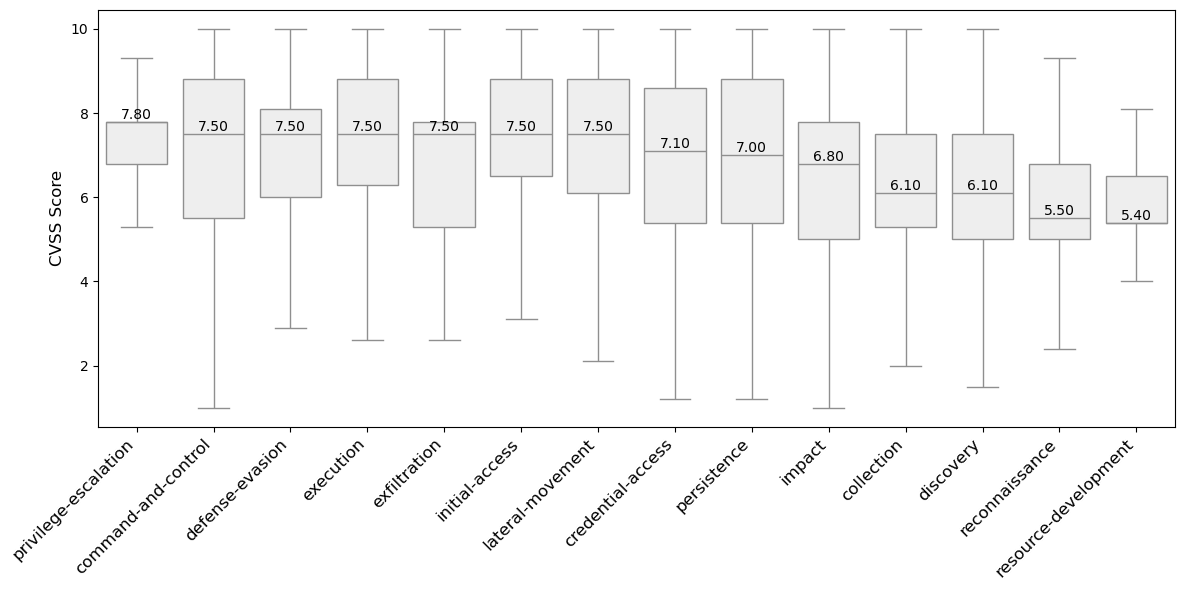

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert lists in 'attack_tactic' column to tuples to make them hashable
attack_df['attack_tactic'] = attack_df['attack_tactic'].apply(lambda x: tuple(x) if isinstance(x, list) else x)

# Remove duplicate rows based on 'cve_id' and 'attack_tactic'
a1234 = attack_df.drop_duplicates(subset=['cve_id', 'attack_tactic'])

# Explode the 'attack_tactic' column to handle multiple tactics per CVE
a1234 = a1234.explode('attack_tactic').reset_index(drop=True)  # Reset index to keep it unique after exploding

# Sort by median CVSS score
ordered_tactics = a1234.groupby('attack_tactic')['cvss_score'].median().sort_values(ascending=False).index
a1234['attack_tactic'] = pd.Categorical(a1234['attack_tactic'], categories=ordered_tactics, ordered=True)

# Create the box plot for CVSS score by attack tactic without outliers
plt.figure(figsize=(12, 6))  # Define figure size
sns.boxplot(x='attack_tactic', y='cvss_score', data=a1234, showfliers=False, color="#EEE")  # Set color to light gray and hide outliers

# Calculate the median values and annotate on the plot
medians = a1234.groupby('attack_tactic')['cvss_score'].median()

# Adding median labels above each box
for index, tactic in enumerate(ordered_tactics):
    median_value = medians[tactic]
    plt.text(index, median_value, f'{median_value:.2f}', ha='center', va='bottom', color='black', fontsize=10)

# Customize plot appearance
plt.ylabel('CVSS Score', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.xlabel('')  # Remove x-axis label


# Adjust layout for better spacing and display
plt.tight_layout()
plt.savefig("attack_cvss.pdf", format='pdf', dpi=300)
plt.show()


In [63]:
import requests
import pandas as pd

# Step 1: Load JSON data from URL
url = "https://raw.githubusercontent.com/mitre-attack/attack-stix-data/refs/heads/master/enterprise-attack/enterprise-attack-12.0.json"
response = requests.get(url)
data = response.json()

# Step 2: Extract APT groups and attack patterns with relationships
attack_patterns = {}
apt_groups = {}
relationships = []

for item in data["objects"]:
    # Extract attack patterns
    if item["type"] == "attack-pattern":
        ext_ref = next((ref for ref in item.get("external_references", []) if ref.get("source_name") == "mitre-attack"), None)
        attack_id = ext_ref["external_id"] if ext_ref else None
        if attack_id:
            kill_chain_phases = [phase["phase_name"] for phase in item.get("kill_chain_phases", [])]
            attack_patterns[item["id"]] = {
                "attack_technique": attack_id,
                "kill_chain_phases": kill_chain_phases
            }
    
    # Extract APT groups, using alias or fallback to external_id if alias is missing
    elif item["type"] == "intrusion-set":
        aliases = item.get("aliases", [])
        if aliases:
            apt_groups[item["id"]] = aliases[0]
        else:
            # Fallback to external_id if available, print warning otherwise
            ext_ref = next((ref for ref in item.get("external_references", []) if ref.get("source_name") == "mitre-attack"), None)
            if ext_ref and "external_id" in ext_ref:
                apt_groups[item["id"]] = ext_ref["external_id"]
            else:
                print(f"No alias or external_id for intrusion-set ID: {item['id']}")
    
    # Extract relationships
    elif item["type"] == "relationship" and item["relationship_type"] == "uses":
        source_ref = item.get("source_ref")
        target_ref = item.get("target_ref")
        if source_ref in apt_groups and target_ref in attack_patterns:
            relationships.append({
                "apt_group": apt_groups[source_ref],
                "attack_pattern_id": target_ref
            })

# Step 3: Map relationships to create a DataFrame with Attack Technique, Kill Chain Phases, and APT groups
apt_mapping = {}
for rel in relationships:
    attack_id = rel["attack_pattern_id"]
    apt_name = rel["apt_group"]
    if attack_id in attack_patterns:
        technique = attack_patterns[attack_id]["attack_technique"]
        kill_chain_phases = attack_patterns[attack_id]["kill_chain_phases"]
        
        if technique not in apt_mapping:
            apt_mapping[technique] = {
                "attack_technique": technique,
                "kill_chain_phases": kill_chain_phases,
                "apt_groups": [apt_name]
            }
        else:
            apt_mapping[technique]["apt_groups"].append(apt_name)

# Step 4: Convert to DataFrame and display
apt_df = pd.DataFrame(apt_mapping.values())
apt_df["apt_groups"] = apt_df["apt_groups"].apply(lambda x: list(set(x)))  # Remove duplicates
display(apt_df)


,attack_technique,kill_chain_phases,apt_groups
0,T1003.001,[credential-access],"[Threat Group-3390, Earth Lusca, APT32, Operat..."
1,T1204.001,[execution],"[Transparent Tribe, TA505, Dragonfly 2.0, Eart..."
2,T1059.001,[execution],"[FIN10, Threat Group-3390, TA505, Dragonfly 2...."
3,T1571,[command-and-control],"[APT33, DarkVishnya, Magic Hound, FIN7, Silenc..."
4,T1560,[collection],"[Patchwork, Dragonfly, APT32, Honeybee, menuPa..."
...,...,...,...
414,T1086,[execution],"[G0057, Dragonfly]"
415,T1100,"[persistence, privilege-escalation]","[G0057, Dragonfly]"
416,T1081,[credential-access],[APT28]
417,T1107,[defense-evasion],"[G0057, Dragonfly, APT32]"


/var/folders/qb/z7q3w2md0c3c0s29ngj6p0600000gn/T/ipykernel_91459/3971425813.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



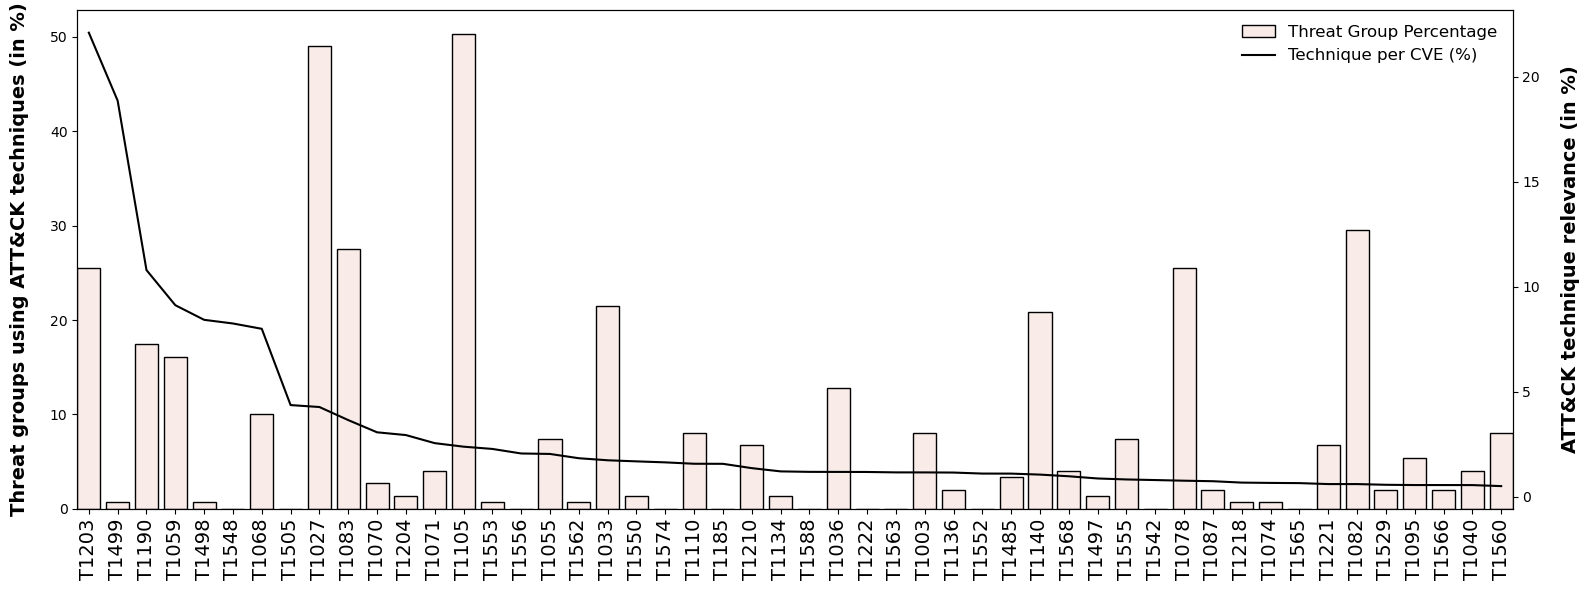

In [64]:
# Count occurrences of each attack technique in attack_df
technique_counts = attack_df['attack_technique'].value_counts().head(50).reset_index()
technique_counts.columns = ['attack_technique', 'count']

# Merge with apt_df to add APT group data
merged_df = technique_counts.merge(apt_df, on='attack_technique', how='left')

# Calculate the percentage of APT groups capable of executing each technique
total_apt_groups = 149  # Total number of unique APT groups
merged_df['apt_percentage'] = merged_df['apt_groups'].apply(lambda x: len(x) if isinstance(x, list) else 0) / total_apt_groups * 100

# Calculate the percentage of techniques per CVE
total_cves = len(attack_df['cve_id'].unique())  # Total number of unique CVEs
merged_df['technique_per_cve_percentage'] = (merged_df['count'] / total_cves) * 100

# Create plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(16, 6))

# Bar chart for APT group percentage (left y-axis)
ax1.bar(merged_df['attack_technique'], merged_df['apt_percentage'], color=(198/255, 63/255, 31/255, 0.1), edgecolor='black', label='Threat Group Percentage')
ax1.set_ylabel('Threat groups using ATT&CK techniques (in %)', color='black', fontsize=14, fontweight="bold", labelpad=15)  # Increase distance with labelpad
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(merged_df['attack_technique'], rotation=90, fontsize=14)

# Remove whitespace by adjusting x-axis limits
ax1.set_xlim(-0.4, len(merged_df['attack_technique']) - 0.6)

# Secondary y-axis for technique percentage per CVE (line plot) with y-axis labels
ax2 = ax1.twinx()
ax2.plot(merged_df['attack_technique'], merged_df['technique_per_cve_percentage'], color='black', linestyle='-', linewidth=1.5, label='Technique per CVE (%)')
ax2.set_ylabel('ATT&CK technique relevance (in %)', color='black',fontsize=14, fontweight="bold", labelpad=15)  # Increase distance with labelpad
ax2.tick_params(axis='y', labelcolor='black')

# Titles and grid
fig.tight_layout()
# plt.grid(axis='y', linestyle='--', linewidth=1)
# Add both the bar and line chart to the legend
handles1, labels1 = ax1.get_legend_handles_labels()  # Get handles and labels for bar chart
handles2, labels2 = ax2.get_legend_handles_labels()  # Get handles and labels for line chart
legend = ax2.legend(handles1 + handles2, labels1 + labels2, fontsize=12, loc='upper right', facecolor='white', edgecolor='white', frameon=True)

# Customize legend with white background and black border for Technique Count only
#legend = ax2.legend(['ATT&CK technique relevance (in %)'], fontsize=12, loc='upper right', facecolor='white', edgecolor='white', frameon=True)
legend.get_frame().set_linewidth(1.5)
fig.savefig("attack_technique_analysis.pdf", format='pdf', dpi=300)
plt.show()


In [65]:
# Count CVEs per technique from `merged_df`
cve_counts_per_technique = attack_df.groupby('attack_technique')['cve_id'].nunique().reset_index()
cve_counts_per_technique.columns = ['attack_technique', 'cve_count']

# Merge with `apt_df` to associate APT groups with CVE counts per technique
apt_technique_cve_df = apt_df.explode('apt_groups').merge(cve_counts_per_technique, on='attack_technique', how='left')

# Group by APT group to sum up the potential CVE exploit counts, removing duplicates
top_apt_groups = apt_technique_cve_df.drop_duplicates(subset=['apt_groups', 'attack_technique']).groupby('apt_groups')['cve_count'].sum().nlargest(20).reset_index()

# Format the cve_count column with commas and remove decimals
top_apt_groups['cve_count'] = top_apt_groups['cve_count'].apply(lambda x: f"{int(x):,}")

# Add a ranking column at the start
top_apt_groups.insert(0, 'Rank', top_apt_groups.index + 1)

# Split into two tables
first_half = top_apt_groups.iloc[:10].copy()
second_half = top_apt_groups.iloc[10:].copy()

# LaTeX table for first half
latex_table_1 = first_half.to_latex(index=False, header=['Rank', 'APT Group', 'Potential CVEs Exploited'], caption="Top 10 APT Groups by Potential CVE Exploits (1-10)", label="tab:top_apt_groups_1", column_format="rll")
print(latex_table_1)

# LaTeX table for second half
latex_table_2 = second_half.to_latex(index=False, header=['Rank', 'APT Group', 'Potential CVEs Exploited'], caption="Top 10 APT Groups by Potential CVE Exploits (11-20)", label="tab:top_apt_groups_2", column_format="rll")
print(latex_table_2)


\begin{table}
\caption{Top 10 APT Groups by Potential CVE Exploits (1-10)}
\label{tab:top_apt_groups_1}
\begin{tabular}{rll}
\toprule
Rank & APT Group & Potential CVEs Exploited \\
\midrule
1 & APT28 & 130,509 \\
2 & Dragonfly & 106,246 \\
3 & APT29 & 103,474 \\
4 & Sandworm Team & 96,180 \\
5 & APT32 & 95,086 \\
6 & Lazarus Group & 93,865 \\
7 & Threat Group-3390 & 86,860 \\
8 & APT41 & 79,639 \\
9 & MuddyWater & 79,431 \\
10 & Cobalt Group & 76,738 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{Top 10 APT Groups by Potential CVE Exploits (11-20)}
\label{tab:top_apt_groups_2}
\begin{tabular}{rll}
\toprule
Rank & APT Group & Potential CVEs Exploited \\
\midrule
11 & APT37 & 71,008 \\
12 & BRONZE BUTLER & 64,761 \\
13 & APT33 & 62,658 \\
14 & Axiom & 61,719 \\
15 & APT39 & 61,567 \\
16 & BITTER & 61,455 \\
17 & Tropic Trooper & 61,078 \\
18 & APT3 & 59,094 \\
19 & Ke3chang & 57,871 \\
20 & Patchwork & 57,759 \\
\bottomrule
\end{tabular}
\end{table}

